<a href="https://colab.research.google.com/github/mutuceng/house-pricing/blob/main/Backend/ML/data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [43]:
house_test = pd.read_csv('house-pricing/test.csv')
house_train = pd.read_csv('house-pricing/train.csv')

In [44]:
house_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [45]:
house_train.shape

(1460, 81)

In [46]:
# 81 column çok fazla azaltmak gerek

In [47]:
null_columns = house_train.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [48]:
null_columns.count()


19

In [11]:
# 19 farklı column null değer içeriyor bunlardan en fazla null içerenler
# PoolQC, MiscFeature, Alley, Fence SAYILARI ÇOK ciddi

In [10]:
# Sütun isimleri pek anlaşılabilir değil ama çok sütun var azaltmadan türkçeleştirmeyelim

<Axes: >

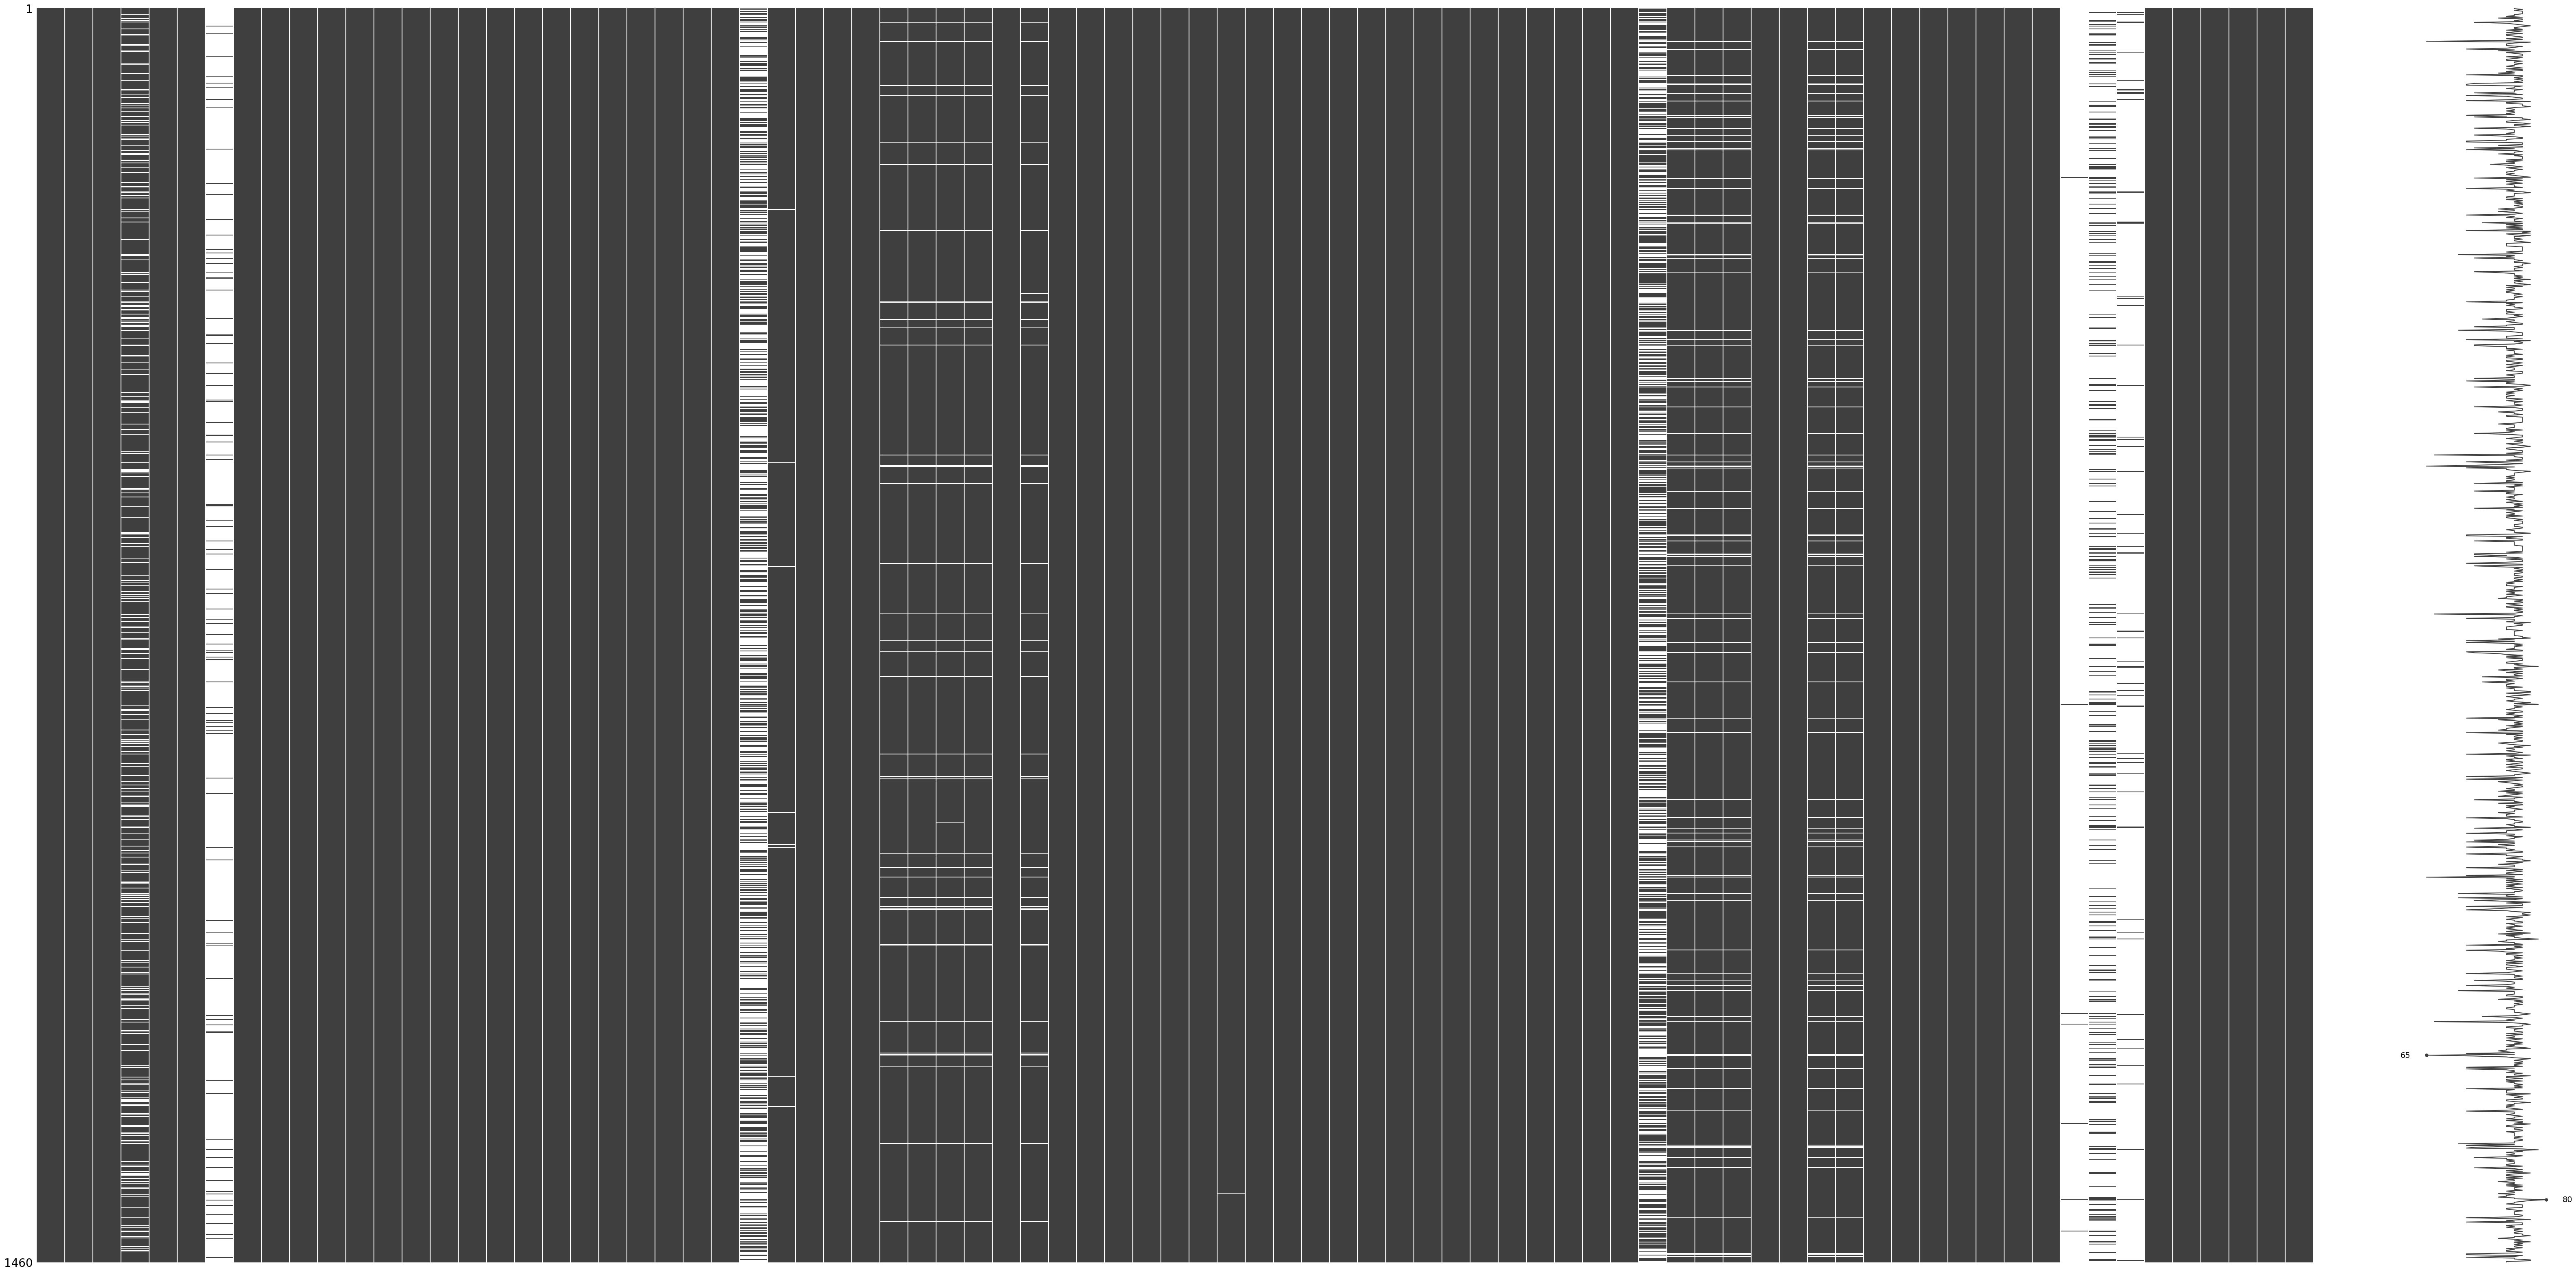

In [14]:
import missingno
missingno.matrix(house_train, figsize=(80, 40)) #genislik,yukselik

In [27]:
missing_ratio = house_train.isna().mean()
high_missing_columns = missing_ratio[missing_ratio > 0.6].index
high_missing_columns


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [49]:
house_train["PoolQC"]

,PoolQC
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1455,NaN
1456,NaN
1457,NaN
1458,NaN


In [50]:
# Havuz kalitesi için sıralı kodlama
pool_mapping = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'No Pool': 0}
house_train['PoolQC'] = house_train['PoolQC'].fillna('No Pool')  # Eksik değerler 'No Pool' ile dolduruluyor
house_train['PoolQC'] = house_train['PoolQC'].map(pool_mapping)
house_train["PoolQC"]


,PoolQC
0,0
1,0
2,0
3,0
4,0
...,...
1455,0
1456,0
1457,0
1458,0


In [51]:
house_train["PoolQC"].unique()


array([0, 4, 1, 3])

In [52]:
house_train["PoolQC"].value_counts()

,count
PoolQC,
0,1453
3,3
4,2
1,2


In [ ]:
#Şimdi Fence için benzer işlemleri yapalım

In [53]:
house_train["Fence"]

,Fence
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1455,NaN
1456,MnPrv
1457,GdPrv
1458,NaN


In [54]:
house_train["Fence"].value_counts()

,count
Fence,
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


In [55]:
house_train['Fence'] = house_train['Fence'].fillna('No Fence')  # Eksik değerler 'No Fence' ile. dolduruluyor

In [56]:
house_train["Fence"].value_counts()

,count
Fence,
No Fence,1179
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


In [57]:
# Fence kalitesi için sıralı kodlama
fence_mapping = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'No Fence': 0}
house_train['Fence'] = house_train['Fence'].map(fence_mapping)
house_train["Fence"]

,Fence
0,0
1,0
2,0
3,0
4,0
...,...
1455,0
1456,3
1457,4
1458,0


In [58]:
house_train["Fence"].value_counts()

,count
Fence,
0,1179
3,157
4,59
2,54
1,11


In [60]:
null_columns = house_train.isna().sum()
null_columns = null_columns[null_columns > 0]
null_columns

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
# Alley ve MiscFeature

In [67]:
house_train["MiscFeature"].value_counts()

KeyError: 'MiscVal'

In [63]:
house_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1194,1195,60,RL,80.0,9364,Pave,NaN,Reg,Lvl,AllPub,...,0,0,3,NaN,0,3,2010,WD,Normal,158000
904,905,20,RL,NaN,6173,Pave,NaN,IR1,Lvl,AllPub,...,0,0,3,NaN,0,8,2007,WD,Normal,125500
1109,1110,20,RL,107.0,11362,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,3,2009,WD,Normal,280000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,0,6,2008,WD,AdjLand,82000
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,0,8,2007,WD,Abnorml,129000


from matplotlib import pyplot as plt
_df_0['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MSSubClass'].plot(kind='hist', bins=20, title='MSSubClass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['LotFrontage'].plot(kind='hist', bins=20, title='LotFrontage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['LotArea'].plot(kind='hist', bins=20, title='LotArea')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('LotShape').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('LotConfig').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Neighborhood').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('BldgType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Id', y='MSSubClass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='MSSubClass', y='LotFrontage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='LotFrontage', y='LotArea', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='LotArea', y='OverallQual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BsmtFinSF2']
  ys = series['Id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('BsmtFinSF2', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('LotShape')):
  _plot_series(series, series_name, i)
  fig.legend(title='LotShape', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BsmtFinSF2')
_ = plt.ylabel('Id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BsmtFinSF2']
  ys = series['Id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('BsmtFinSF2', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('LotConfig')):
  _plot_series(series, series_name, i)
  fig.legend(title='LotConfig', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BsmtFinSF2')
_ = plt.ylabel('Id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BsmtFinSF2']
  ys = series['Id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('BsmtFinSF2', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Neighborhood')):
  _plot_series(series, series_name, i)
  fig.legend(title='Neighborhood', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BsmtFinSF2')
_ = plt.ylabel('Id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['BsmtFinSF2']
  ys = series['Id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('BsmtFinSF2', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('BldgType')):
  _plot_series(series, series_name, i)
  fig.legend(title='BldgType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BsmtFinSF2')
_ = plt.ylabel('Id')

from matplotlib import pyplot as plt
_df_16['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['MSSubClass'].plot(kind='line', figsize=(8, 4), title='MSSubClass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['LotFrontage'].plot(kind='line', figsize=(8, 4), title='LotFrontage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['LotArea'].plot(kind='line', figsize=(8, 4), title='LotArea')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['LotConfig'].value_counts()
    for x_label, grp in _df_20.groupby('LotShape')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('LotShape')
_ = plt.ylabel('LotConfig')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Neighborhood'].value_counts()
    for x_label, grp in _df_21.groupby('LotConfig')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('LotConfig')
_ = plt.ylabel('Neighborhood')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BldgType'].value_counts()
    for x_label, grp in _df_22.groupby('Neighborhood')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Neighborhood')
_ = plt.ylabel('BldgType')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['HouseStyle'].value_counts()
    for x_label, grp in _df_23.groupby('BldgType')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('BldgType')
_ = plt.ylabel('HouseStyle')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['LotShape'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Id', y='LotShape', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['LotConfig'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Id', y='LotConfig', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Neighborhood'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Id', y='Neighborhood', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['BldgType'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Id', y='BldgType', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [64]:
house_train.drop(columns=["Id"], inplace=True)

In [71]:
house_train[["MiscFeature", "MiscVal"]].dropna(subset=["MiscFeature"]).sample(10)


,MiscFeature,MiscVal
1252,Shed,600
214,Shed,450
1200,Shed,0
84,Shed,700
250,Shed,450
51,Shed,400
733,Shed,400
99,Shed,400
1171,Shed,1400
794,Shed,500


In [72]:
house_train[["MiscFeature", "MiscVal"]].dropna(subset=["MiscFeature"])

,MiscFeature,MiscVal
5,Shed,700
7,Shed,350
16,Shed,700
17,Shed,500
51,Shed,400
84,Shed,700
95,Shed,480
98,Shed,400
99,Shed,400
106,Shed,450


In [ ]:
#MiscValue'su 0 olan değerleri ortalamalarıyla değiştiriyoruz

In [74]:
mean_miscval = house_train.groupby("MiscFeature")["MiscVal"].mean()
mean_miscval

,MiscVal
MiscFeature,
Gar2,11900.000000
Othr,1750.000000
Shed,697.836735
TenC,2000.000000


MiscFeature değeri olup, MiscVal değeri 0 olan satırlarda MiscVal'ı, aynı MiscFeature için
ortalama değeri ile değiştiriyoruz


In [76]:
mask = (house_train["MiscFeature"].notna()) & (house_train["MiscVal"] == 0)
house_train.loc[mask, "MiscVal"] = house_train.loc[mask, "MiscFeature"].map(mean_miscval)

<ipython-input-76-7b11228e4e40>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1750.          697.83673469]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  house_train.loc[mask, "MiscVal"] = house_train.loc[mask, "MiscFeature"].map(mean_miscval)


Değeri olmayan MiscVal kalmadı

In [78]:
print(house_train[mask])

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]


Böylelikle veri setini 1 sütun azaltmıs olduk

In [81]:
house_train.drop(columns=["MiscFeature"], inplace=True)

In [85]:
house_train.shape

(1460, 79)

Şimdi Alley ile uğraşma zamanı

In [86]:
house_train["Alley"].value_counts()

,count
Alley,
Grvl,50
Pave,41


Alley mülk arazisine nasıl erişildiğini gösteren bir değişken ve bu kadar fazla Null içermesi mantıklı değil. Önceki methodu uygulayacak olursak yaklaşık bin ev için yol erişimi yok demek sağlıklı olmaz. Bu yüzden bu sütunu komple kaldırıyorum.

In [88]:
house_train.drop(columns=["Alley"], inplace=True)

In [89]:
house_train["MasVnrType"].value_counts()

,count
MasVnrType,
BrkFace,445
Stone,128
BrkCmn,15


MasVnrType evin dış cephesinde ne kullandıldığını gösteren bir değişken.
872 tane null içeren satırımız var bu attribute için. En çok tekrar eden değer açık ara farkla BrkFace ama 872 tanenin hepsini bunla doldurmak mantıklı mı?

In [92]:
house_train[["MasVnrType", "MasVnrArea"]].dropna(subset=["MasVnrType"]).sample(10)

,MasVnrType,MasVnrArea
306,BrkFace,246.0
305,Stone,246.0
333,Stone,146.0
885,BrkFace,60.0
347,BrkFace,30.0
990,BrkFace,423.0
543,BrkFace,182.0
151,Stone,436.0
1157,Stone,166.0
869,BrkFace,246.0


MasVnrType ve MasVnrArea arasında bir ilişki kurup null değerleri o ilişkiye göre dolduramaz mıyım

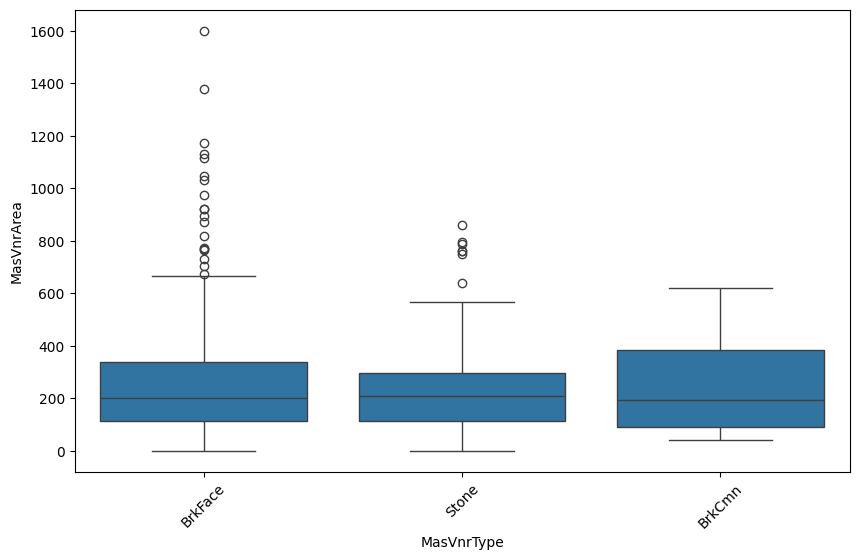

In [94]:
plt.figure(figsize=(10, 6))
sn.boxplot(x='MasVnrType', y='MasVnrArea', data=house_train)
plt.xticks(rotation=45)
plt.show()

In [96]:
mean_area_by_type = house_train.groupby('MasVnrType')['MasVnrArea'].mean()
mean_area_by_type

,MasVnrArea
MasVnrType,
BrkCmn,247.666667
BrkFace,259.008989
Stone,239.304688


Hemen hemen birbirlerine yakın MasVnrType değerleri alıyorlar. Bu yüzden ilişkiden bir şey elde edemedim ancak duvar kalınlıkları birbirine yakın oldugundan bu sütundan da kurtulabilirim

In [98]:
house_train.drop(columns=["MasVnrArea"], inplace=True)

tüm null değerleri en çok tekrar eden değerle doldurmak yerine null olmayan değerlerin yüzdesine göre doldursam mesela null olmayan değerlerin yüzde 60ı BrkFace ise null değerlerin %60ını BrkFace ile doldurayım

In [99]:
# MasVnrType'ın her bir değerinin yüzdesini hesaplayalım (null olmayanlar)
value_counts = house_train['MasVnrType'].value_counts(normalize=True)
print(value_counts)


MasVnrType
BrkFace    0.756803
Stone      0.217687
BrkCmn     0.025510
Name: proportion, dtype: float64


In [102]:
null_indices = house_train[house_train['MasVnrType'].isnull()].index

fill_values = np.random.choice(value_counts.index, size=len(null_indices), p=value_counts.values)

In [103]:
house_train.loc[null_indices, 'MasVnrType'] = fill_values

In [104]:
house_train["MasVnrType"].value_counts()

,count
MasVnrType,
BrkFace,1116
Stone,305
BrkCmn,39


In [106]:
house_train.shape

(1460, 77)

In [105]:
house_train["SalePrice"].mean()

180921.19589041095

In [16]:
house_train["SalePrice"].std()

79442.50288288663

In [107]:
numerical_features = house_train.select_dtypes(include=[np.number]).columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [108]:
categorical_features = house_train.select_dtypes(include=[object]).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Neredeyse yarı yarıya